# Topic Modeling the Native Voices Corpus



## Methods and Preprocessing

To create each model, I used the Latent Dirichlet Allocation algorithm instantiated in MALLET, a command-line package for topic modeling. 

<b>Parameters:</b> In addition to specifying the number of topics, I also used the optimize-interval option, set to 20 to ensure more accuracy in the weighting of topics. 

<b>Output:</b> I output the following files for present and future analysis:
<ul>
    <li>topic-states.gz for use in with pyLDAvis</li>
    <li>topic-keys.txt, which I then converted to a csv file by replacing tabs with commas, saving it as this alternative file format with UTF-8 encoding, and adding a header row</li>
    <li>doc-topics.txt, which I converted to a csv file by replacing tabs with commas, and saving it as a csv with UTF-8 encoding. I then removed the first two columns with document numbers and filepaths, converted the scientific notation to numerals with six digits after the decimal place, and added a header after manually labeling each of the topics based on my analysis of the keys file.</li>
    <li>word-topic-counts-file as a txt file, which I've saved for potential later analysis and visualization using word clouds.</li>
</ul>

## Experimental Visualizations

In [2]:
# Open the topic-keys.txt that you created with MALLET. Replace the tab characters with commas. 
# Then save that file as a .csv.

import pandas as pd

nv40_topics = pd.Cov = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/40/csv/nv40-keys.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

# nv40_topics

nv40_topics.style.set_properties(subset=['top_words'], **{'width': '600px'})

,topic_number,topic_weight,top_words
0,0,0.028230,parsons general ohio congress connecticut governor territory marietta company lands dear west pittsburgh putnam western country enoch washington hundred johnson
1,1,0.169900,men march horses town man body left horse officer officers party day night troops expedition attack command provisions ground enemy
2,2,0.017970,georgia treaty agent general mcintosh state states gaines troup government commissioners colonel governor creek chiefs indian crowell executive survey testimony
3,3,0.281530,people good friends land give told gave answer matter true interest put power bad informed remain making state justice hand
4,4,0.009820,fief seigniory reverend monsieur fathers quebec depth father leagues front arpents side river league farms france possession louis deed rivers
5,5,0.190570,states united lands treaty state indians congress indian nation president senate act claim part georgia territory claims treaties made title
6,6,0.027970,united states creeks cherokees towns nation blount people lower treaty governor chiefs cumberland cherokee peace tennessee war business president watts
7,7,0.171440,miles day river men made place night morning creek found evening set passed water arrived days indians land good captain
8,8,0.035450,river water miles red country side mouth missouri small high called hundred lake bayou large mississippi mountains soil page years
9,9,0.130890,indians brethren david indian detroit lake land back sandusky heard place good thing heckewelder told pittsburg fort white wished news


In [3]:
# Create a list of topic labels.
labels = ['0 parsons','1 militarytravel','2 georgia','3 friendshipandpower','4 frenchcanadianlands','5 treaty-govt','6 creeks','7 travelogue','8 naturalfeatures','9 heckewelder','10 treaty-war','11 military','12 landownership','13 commodities','14 correspondences','15 government','16 negotiations','17 floridatreaty','18 US-nativerelations','19 treatycommunications','20 militarywrittencommunication','21 familylife','22 treatycouncil-relations','23 treaty-geography','24 treatycounciladdress','25 language','26 treaty-landecon','27 finance','28 militarygovt','29 militarymovement','30 military','31 trade','32 legal','33 religion','34 militaryinfo','35 militaryexpeditions','36 treatycouncil-relations2','37 land','38 missionaries','39 language-abstract']
# Add the labels list as a new column to the dataframe
nv40_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
nv40_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

,topic_number,topic_weight,top_words,labels
0,0,0.028230,parsons general ohio congress connecticut governor territory marietta company lands dear west pittsburgh putnam western country enoch washington hundred johnson,0 parsons
1,1,0.169900,men march horses town man body left horse officer officers party day night troops expedition attack command provisions ground enemy,1 militarytravel
2,2,0.017970,georgia treaty agent general mcintosh state states gaines troup government commissioners colonel governor creek chiefs indian crowell executive survey testimony,2 georgia
3,3,0.281530,people good friends land give told gave answer matter true interest put power bad informed remain making state justice hand,3 friendshipandpower
4,4,0.009820,fief seigniory reverend monsieur fathers quebec depth father leagues front arpents side river league farms france possession louis deed rivers,4 frenchcanadianlands
5,5,0.190570,states united lands treaty state indians congress indian nation president senate act claim part georgia territory claims treaties made title,5 treaty-govt
6,6,0.027970,united states creeks cherokees towns nation blount people lower treaty governor chiefs cumberland cherokee peace tennessee war business president watts,6 creeks
7,7,0.171440,miles day river men made place night morning creek found evening set passed water arrived days indians land good captain,7 travelogue
8,8,0.035450,river water miles red country side mouth missouri small high called hundred lake bayou large mississippi mountains soil page years,8 naturalfeatures
9,9,0.130890,indians brethren david indian detroit lake land back sandusky heard place good thing heckewelder told pittsburg fort white wished news,9 heckewelder


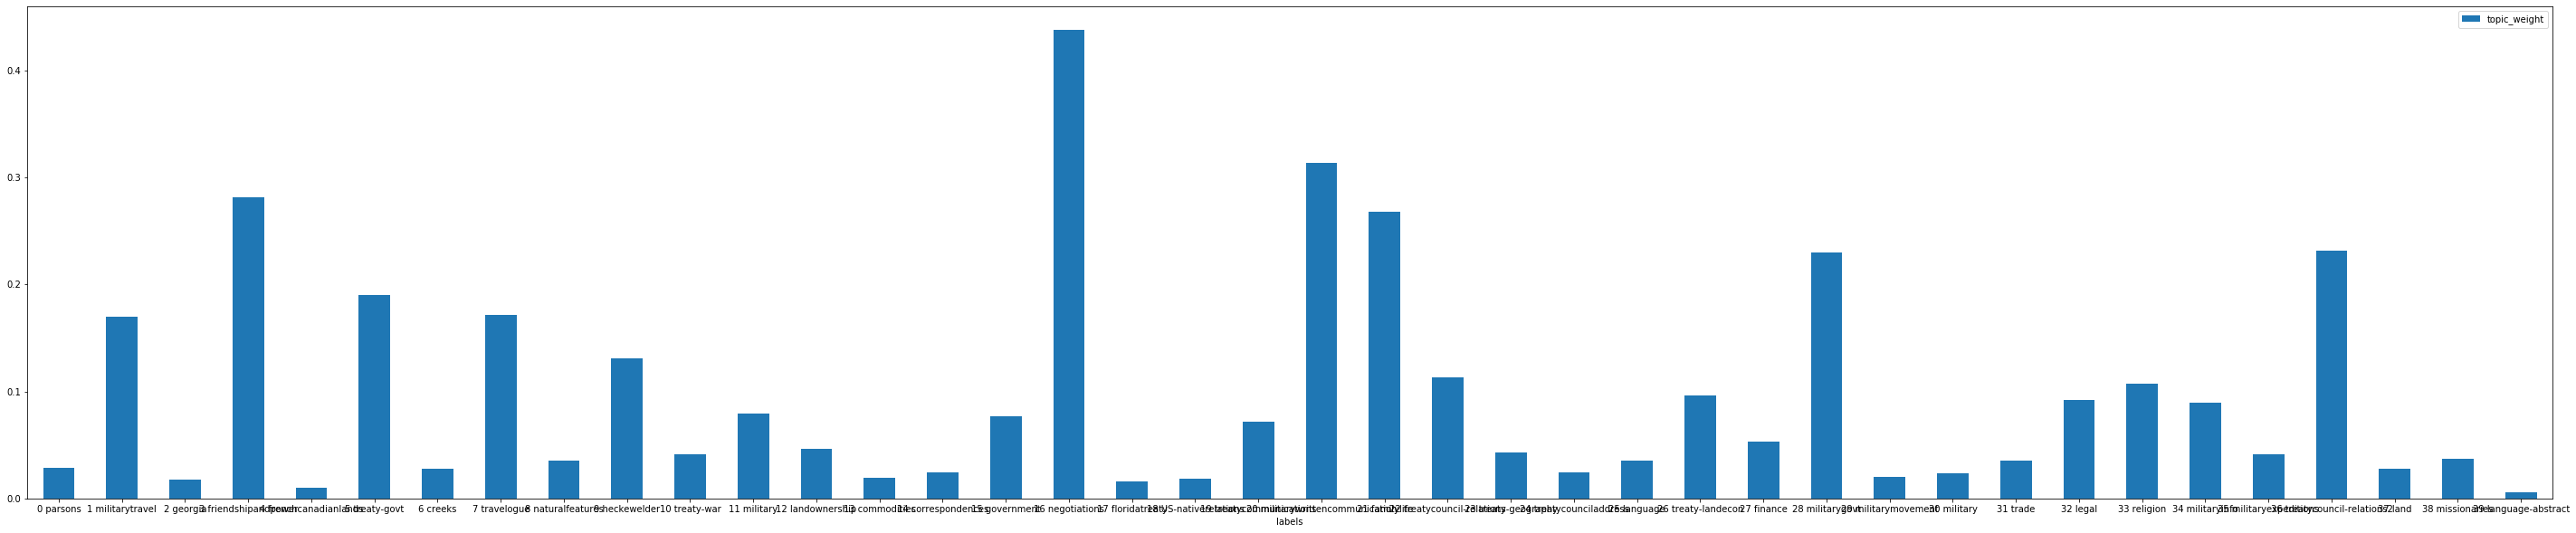

In [6]:
# Represent the weights of the topics as a simple bar chart, using the author-created topic labels. 

topic_bar = nv40_topics.plot.bar(x='labels', y='topic_weight', rot=0, figsize=(50,10))

In [10]:
# The mallet .txt doc-topics output file was converted to a csv, the document number and filepath columns 
# were deleted (in a copy of the original file), the number format was changed from scientific to decimal with 
# 6 places, and the labels from the previous step were added as column headers
# in advance of reading the csv into a pandas dataframe.

nv40_docs1 = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/40/csv/nv40-docs1.csv", sep=',')

# Preview the data
nv40_docs1.head()

,'0 parsons','1 militarytravel','2 georgia','3 friendshipandpower','4 frenchcanadianlands','5 treaty-govt','6 creeks','7 travelogue','8 naturalfeatures','9 heckewelder',...,'30 military','31 trade','32 legal','33 religion','34 militaryinfo','35 militaryexpeditions','36 treatycouncil-relations2','37 land','38 missionaries','39 language-abstract'
0,0.000119,0.000718,0.000076,0.001189,0.000042,0.249980,0.004341,0.000724,0.000150,0.000553,...,0.000100,0.000149,0.000388,0.000452,0.000379,0.000173,0.000980,0.000118,0.000155,0.000023
1,0.000008,0.012221,0.000005,0.000084,0.000003,0.000057,0.000008,0.258305,0.000011,0.000336,...,0.000007,0.000011,0.000324,0.000032,0.000027,0.000012,0.074873,0.000008,0.000011,0.000002
2,0.000009,0.000055,0.000006,0.046244,0.000003,0.080341,0.030560,0.008831,0.015937,0.000043,...,0.000008,0.008787,0.015306,0.000360,0.008480,0.000013,0.137557,0.112789,0.011062,0.000002
3,0.000048,0.000287,0.000030,0.020753,0.000017,0.000322,0.000047,0.000290,0.000060,0.001911,...,0.000040,0.005129,0.008604,0.000181,0.000151,0.000069,0.578308,0.000047,0.000062,0.000009
4,0.000001,0.035985,0.000000,0.069786,0.000000,0.005395,0.085425,0.022285,0.000001,0.000002,...,0.000000,0.001321,0.000002,0.000002,0.166357,0.011499,0.019187,0.000239,0.000001,0.000000


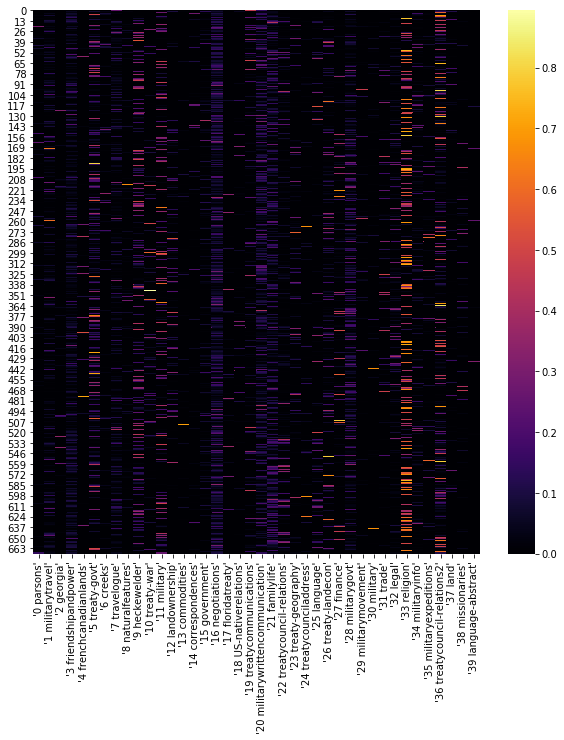

In [11]:
# Represent the topic weights in each document as a heatmap.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set standard figure size to 10 x 10 inches.
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# Set type to float to avoid unexexpected type error.
nv40_docs1 = nv40_docs1[nv40_docs1.columns].astype(float)  # or int

# Simpler code to create the default heatmap with the given figure size in line one above. Make it accessible
# by using the 'inferno' colormap. 

sns.heatmap(nv40_docs1, cmap='inferno')


/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


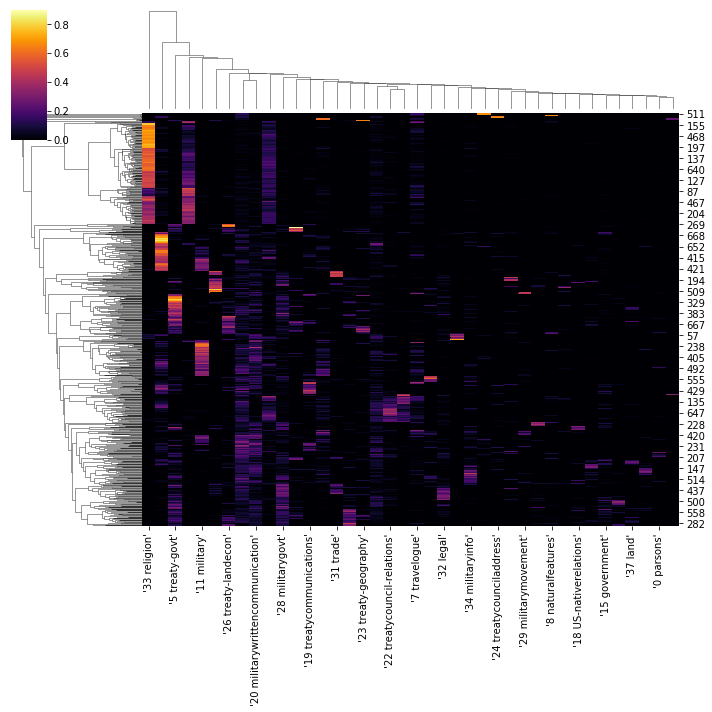

In [12]:
# Create a hierarchical heatmap using seaborn's "clustermap" method with default settings.
# By default this method will cluster by both rows and columns, which is what is most useful for this data.

sns.clustermap(nv40_docs1, cmap='inferno')

## Exploring the model in _pandas_


In [13]:
# In the duplicate csv file of the document-topic output, delete the first column (document number),
# and remove the first part of the filepath so you're left with the filename, and then remove the file
# extension (.txt).
# First we need to read in the csv file that still has the filenames:

nv40_docs = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/40/csv/nv40-docs2.csv", sep=",")

nv40_docs.head()

,filename,'0 parsons','1 militarytravel','2 georgia','3 friendshipandpower','4 frenchcanadianlands','5 treaty-govt','6 creeks','7 travelogue','8 naturalfeatures',...,'30 military','31 trade','32 legal','33 religion','34 militaryinfo','35 militaryexpeditions','36 treatycouncil-relations2','37 land','38 missionaries','39 language-abstract'
0,ASP-IA-v1-82.txt,0.000119,0.000718,0.000076,0.001189,0.000042,0.249980,0.004341,0.000724,0.000150,...,0.000100,0.000149,0.000388,0.000452,0.000379,0.000173,0.000980,0.000118,0.000155,0.000023
1,ASP-IA-v1-82.txt,0.000008,0.012221,0.000005,0.000084,0.000003,0.000057,0.000008,0.258305,0.000011,...,0.000007,0.000011,0.000324,0.000032,0.000027,0.000012,0.074873,0.000008,0.000011,0.000002
2,ASP-IA-v1-82.txt,0.000009,0.000055,0.000006,0.046244,0.000003,0.080341,0.030560,0.008831,0.015937,...,0.000008,0.008787,0.015306,0.000360,0.008480,0.000013,0.137557,0.112789,0.011062,0.000002
3,ASP-IA-v1-82.txt,0.000048,0.000287,0.000030,0.020753,0.000017,0.000322,0.000047,0.000290,0.000060,...,0.000040,0.005129,0.008604,0.000181,0.000151,0.000069,0.578308,0.000047,0.000062,0.000009
4,ASP-IA-v1-82.txt,0.000001,0.035985,0.000000,0.069786,0.000000,0.005395,0.085425,0.022285,0.000001,...,0.000000,0.001321,0.000002,0.000002,0.166357,0.011499,0.019187,0.000239,0.000001,0.000000


In [15]:
# Use the sort_values() method to sort the dataframe by a topic of interest. 

nv40_docs_37 = nv40_docs.sort_values("'37 land'", ascending=False)

nv40_docs_37.head(10)

,filename,'0 parsons','1 militarytravel','2 georgia','3 friendshipandpower','4 frenchcanadianlands','5 treaty-govt','6 creeks','7 travelogue','8 naturalfeatures',...,'30 military','31 trade','32 legal','33 religion','34 militaryinfo','35 militaryexpeditions','36 treatycouncil-relations2','37 land','38 missionaries','39 language-abstract'
593,ASP-IA-v1-82.txt,0.000002,0.004316,0.004308,0.070972,0.000001,0.069200,0.000002,0.028944,0.000002,...,0.004750,0.000002,0.000005,0.000006,0.038106,0.000002,0.037175,0.310828,0.000775,0.000000
568,ASP-IA-v1-82.txt,0.000003,0.004309,0.000002,0.039852,0.000001,0.103532,0.039604,0.022459,0.001324,...,0.000003,0.000004,0.013540,0.000342,0.016620,0.095046,0.009156,0.260267,0.000334,0.000001
92,ASP-IA-v1-82.txt,0.000017,0.013104,0.001784,0.073462,0.000006,0.155570,0.082770,0.000101,0.000021,...,0.000014,0.000021,0.023698,0.000063,0.027243,0.001206,0.082890,0.224632,0.000022,0.000003
12,ASP-IA-v1-82.txt,0.000001,0.010560,0.000001,0.078839,0.000000,0.095361,0.043076,0.009018,0.000002,...,0.002314,0.000002,0.021927,0.000005,0.049872,0.011999,0.038701,0.204533,0.000002,0.000000
475,ASP-IA-v1-82.txt,0.000032,0.001339,0.000021,0.000322,0.000011,0.231397,0.072132,0.018507,0.000041,...,0.000027,0.000040,0.005827,0.000123,0.035581,0.000047,0.003699,0.202600,0.000042,0.000006
590,ASP-IA-v1-82.txt,0.000004,0.015721,0.000003,0.070533,0.000001,0.036558,0.015273,0.018575,0.004571,...,0.000003,0.011421,0.017708,0.000015,0.026697,0.000006,0.093501,0.188794,0.000005,0.000001
72,ASP-IA-v1-82.txt,0.000399,0.002400,0.000254,0.018106,0.000139,0.468917,0.000395,0.002422,0.000501,...,0.000334,0.000498,0.001297,0.001512,0.001266,0.014706,0.003277,0.184060,0.000518,0.000076
432,ASP-IA-v1-82.txt,0.000457,0.083681,0.000291,0.004557,0.000159,0.407738,0.000453,0.002775,0.000574,...,0.000383,0.000571,0.001486,0.017919,0.017637,0.000662,0.003754,0.162315,0.000594,0.000087
283,ASP-IA-v1-82.txt,0.000010,0.000063,0.015540,0.040788,0.000004,0.157997,0.000010,0.000063,0.001493,...,0.000009,0.000013,0.002623,0.000409,0.000033,0.000015,0.004894,0.153869,0.000383,0.000002
77,ASP-IA-v1-82.txt,0.005334,0.000881,0.000093,0.017022,0.000051,0.483401,0.000145,0.000889,0.000184,...,0.000123,0.000183,0.036787,0.000555,0.000465,0.000212,0.006390,0.135013,0.000190,0.000028


I'm currently working on a way to create the corpus as JSON file, which *should* remove the problem of character limits. Then, we can read the JSON file into a pandas dataframe and merge that dataframe with the <b>docs</b> dataframe in order to view the content of each document within the dataframe, rather than having to toggle between a jupyter notebook, finder window, and the plain text files, but for now, the latter option is a workaround.

For our current exploration of the "military" topic, see the <a href="https://voyant-tools.org/?corpus=bdabc2797ab5226bfb1af925351d2ea5&panels=cirrus,reader,trends,summary,contexts">Voyant-Tools interface</a> that I have already pre-populated with the ten most closely related documents.